<a href="https://colab.research.google.com/github/uccaoeo/Kaggle-Learning/blob/main/CURRENT_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
import io



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

How a Typical Submission looks like...This will brief us about our outcome

In [2]:
#check = pd.read_csv(r'C:\Users\hp\Desktop\My LECTURE\DATA SCIENCE\KAGGLE\TITANIC PROJECT\gender_submission.csv')
#check.head()
uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv


Let us examine the train dataset and view the first 5 samples

In [3]:
check= pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
uploaded = files.upload()




Saving train.csv to train.csv


In [5]:
train_df= pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
uploaded = files.upload()


Saving test.csv to test.csv


In [7]:
test= pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numerical Variables...let's deal with those

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Using the plots of missingno, we are able to see where the missing values are located in each column. Let's consider only the numerical variables

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


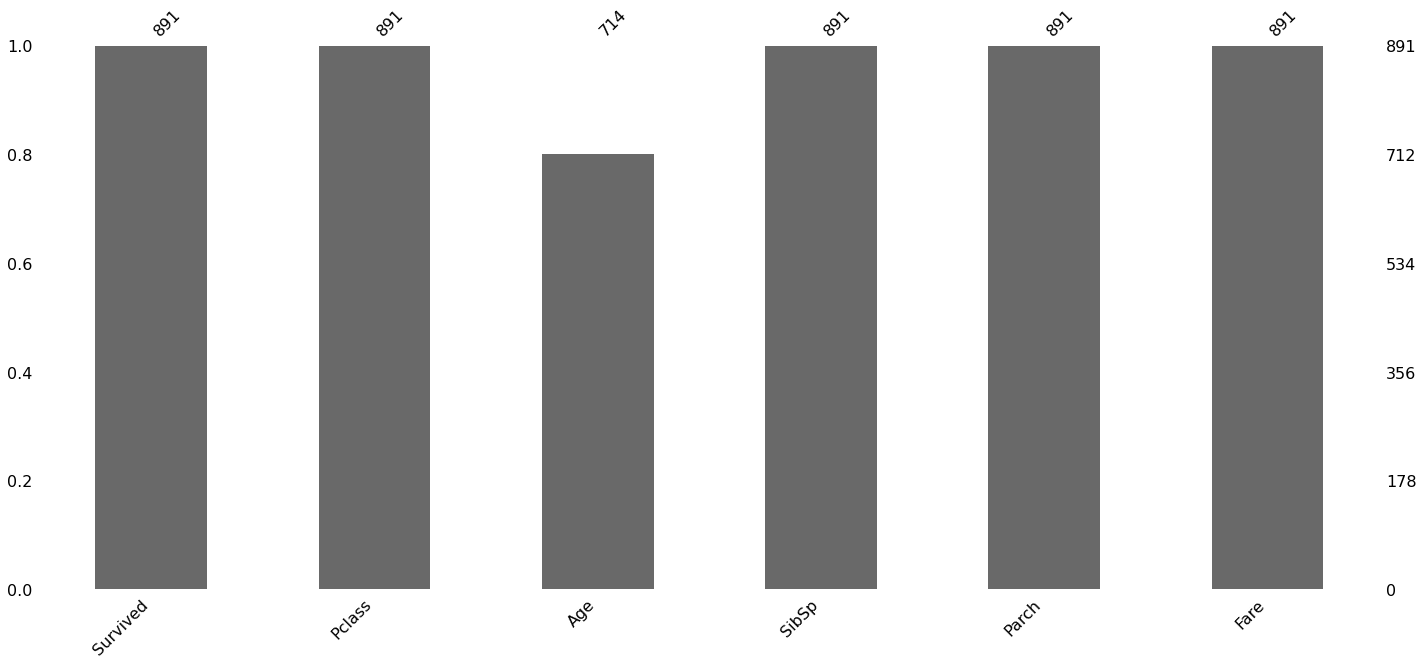

In [10]:

num_variable = train_df.select_dtypes(include='number')
print(num_variable)
import missingno as msno
#msno.matrix(num_variable.drop('PassengerId', axis='columns').sample(100))  First 100 samples
msno.bar(num_variable.drop('PassengerId', axis='columns'))

## It is clear that there are some missing values from the age column. Lets fix that up with the mean of the column

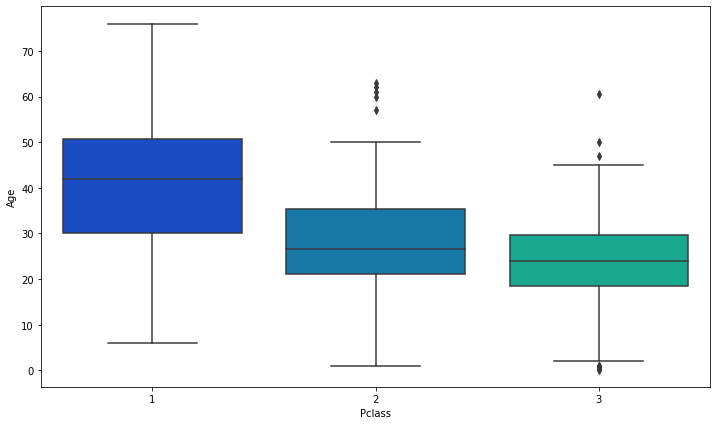

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data = test, palette= 'winter')

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

      if Pclass == 1:
          return 42

      elif Pclass == 2:
          return 26

      else:
          return 23   

    else:
       return Age

In [13]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
#train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
age_mean = train_df['Age'].mean()
print(age_mean)
train_df['Age'].fillna(age_mean, inplace=True)
train_df.tail()



29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
for col in train_df.columns:
    print('There are {0} missing values in {1}'.format(train_df[col].isna().sum(), col))

There are 0 missing values in PassengerId
There are 0 missing values in Survived
There are 0 missing values in Pclass
There are 0 missing values in Name
There are 0 missing values in Sex
There are 0 missing values in Age
There are 0 missing values in SibSp
There are 0 missing values in Parch
There are 0 missing values in Ticket
There are 0 missing values in Fare
There are 687 missing values in Cabin
There are 2 missing values in Embarked


## I am using standardscaler to normalize the 'Age and Fare' variable

In [17]:

train_df.info()
std_scale = StandardScaler()
train_df['Age'] = std_scale.fit_transform(train_df[['Age']])
train_df['Fare'] = std_scale.fit_transform(train_df[['Fare']])
train_df['SibSp'] = std_scale.fit_transform(train_df[['SibSp']])
train_df['Parch'] = std_scale.fit_transform(train_df[['Parch']])
train_df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,-0.207709,-0.474545,-0.473674,211536,-0.386671,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.823344,-0.474545,-0.473674,112053,-0.044381,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000000,0.432793,2.008933,W./C. 6607,-0.176263,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.284663,-0.474545,-0.473674,111369,-0.044381,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,0.177063,-0.474545,-0.473674,370376,-0.492378,NaN,Q


In [18]:
df = train_df.loc[train_df.Embarked.notna(),['Survived', 'Pclass','Sex','Age','SibSp','Parch',\
                                             'Fare', 'Cabin','Embarked']]
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,male,-0.207709,-0.474545,-0.473674,-0.386671,NaN,S
887,1,1,female,-0.823344,-0.474545,-0.473674,-0.044381,B42,S
888,0,3,female,0.000000,0.432793,2.008933,-0.176263,NaN,S
889,1,1,male,-0.284663,-0.474545,-0.473674,-0.044381,C148,C
890,0,3,male,0.177063,-0.474545,-0.473674,-0.492378,NaN,Q


In [19]:
X = df.drop(['Survived', 'Cabin'],axis='columns')  # NOTE....i dropped Age here
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,female,0.638789,0.432793,-0.473674,0.786845,C
2,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,female,0.407926,0.432793,-0.473674,0.420730,S
4,3,male,0.407926,-0.474545,-0.473674,-0.486337,S


In [20]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])
X.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,0.432793,-0.473674,-0.502445,2
1,1,0,0.638789,0.432793,-0.473674,0.786845,0
2,3,0,-0.284663,-0.474545,-0.473674,-0.488854,2
3,1,0,0.407926,0.432793,-0.473674,0.420730,2
4,3,1,0.407926,-0.474545,-0.473674,-0.486337,2


In [21]:
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0,1,6])],   # 6 turn to 5 because of Age
                                      remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X))#dtype = np.str
print(X)

[[ 0.          0.          1.         ...  0.43279337 -0.47367361
  -0.50244517]
 [ 1.          0.          0.         ...  0.43279337 -0.47367361
   0.78684529]
 [ 0.          0.          1.         ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [ 0.          0.          1.         ...  0.43279337  2.00893337
  -0.17626324]
 [ 1.          0.          0.         ... -0.4745452  -0.47367361
  -0.04438104]
 [ 0.          0.          1.         ... -0.4745452  -0.47367361
  -0.49237783]]


In [22]:
y = df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
kfold = StratifiedKFold(n_splits=10)
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y, scoring = "accuracy", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Algorithm":["SVC","DecisionTree","RandomForest","GradientBoosting","ExtraTrees"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res


,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.823430,0.033203
1,DecisionTree,0.772791,0.039745
2,RandomForest,0.806563,0.039020
3,GradientBoosting,0.831269,0.040826
4,ExtraTrees,0.795276,0.043742


In [24]:
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Let's prepare the test data also

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
X_new = test.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis='columns')
X_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
for i in X_new:
    print('There are {0} missing values in {1}'.format(X_new[i].isna().sum(), i))

There are 0 missing values in Pclass
There are 0 missing values in Sex
There are 0 missing values in Age
There are 0 missing values in SibSp
There are 0 missing values in Parch
There are 1 missing values in Fare
There are 0 missing values in Embarked


Let's Fix the missing values in Fare and Age

In [28]:
X_new['Fare'] = X_new['Fare'].replace(np.nan, 7.75)
X_new['Fare'].isna().sum()

0

In [29]:
X_new.info()
std_scale = StandardScaler()
X_new['Age'] = std_scale.fit_transform(X_new[['Age']])
X_new['Fare'] = std_scale.fit_transform(X_new[['Fare']])
X_new['SibSp'] = std_scale.fit_transform(X_new[['SibSp']])
X_new['Parch'] = std_scale.fit_transform(X_new[['Parch']])
X_new.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,3,male,-0.476543,-0.499470,-0.400248,-0.493105,S
414,1,female,0.749037,-0.499470,-0.400248,1.314557,C
415,3,male,0.710737,-0.499470,-0.400248,-0.507445,S
416,3,male,-0.476543,-0.499470,-0.400248,-0.493105,S
417,3,male,-0.476543,0.616992,0.619896,-0.236640,C


In [30]:
le = LabelEncoder()
X_new['Sex'] = le.fit_transform(X_new['Sex'])
X_new['Embarked'] = le.fit_transform(X_new['Embarked'])
X_new.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.404342,-0.499470,-0.400248,-0.497063,1
1,3,0,1.361826,0.616992,-0.400248,-0.511926,2
2,2,1,2.510807,-0.499470,-0.400248,-0.463754,1
3,3,1,-0.170148,-0.499470,-0.400248,-0.482127,2
4,3,0,-0.553142,0.616992,0.619896,-0.417151,2


In [31]:
columnTransformer2 = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0,1,6])],   # 6 turn to 5 because of Age
                                      remainder='passthrough')
X_new = np.array(columnTransformer.fit_transform(X_new))#dtype = np.str
print(X_new)

[[ 0.          0.          1.         ... -0.49947002 -0.4002477
  -0.49706313]
 [ 0.          0.          1.         ...  0.61699237 -0.4002477
  -0.51192594]
 [ 0.          1.          0.         ... -0.49947002 -0.4002477
  -0.46375447]
 ...
 [ 0.          0.          1.         ... -0.49947002 -0.4002477
  -0.50744487]
 [ 0.          0.          1.         ... -0.49947002 -0.4002477
  -0.49310546]
 [ 0.          0.          1.         ...  0.61699237  0.61989583
  -0.23663968]]


In [32]:
z = test['PassengerId']
print(z)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [33]:
prediction = model.predict(X_new)
submission = pd.DataFrame({"PassengerId": z, "Survived": prediction})
print(submission)
submission.to_csv(r'C:\Users\hp\Desktop\advancesubmission.csv', index=False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [34]:
# creating dataframe including the correlations with Survived
df_corr = abs(train_df.corr()).sort_values(by='Survived', ascending=False)[['Survived']]# threshold of 0.4 is selected to filter the features
df_corr[df_corr['Survived']>0.4]

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.069809
SibSp,0.035322
PassengerId,0.005007


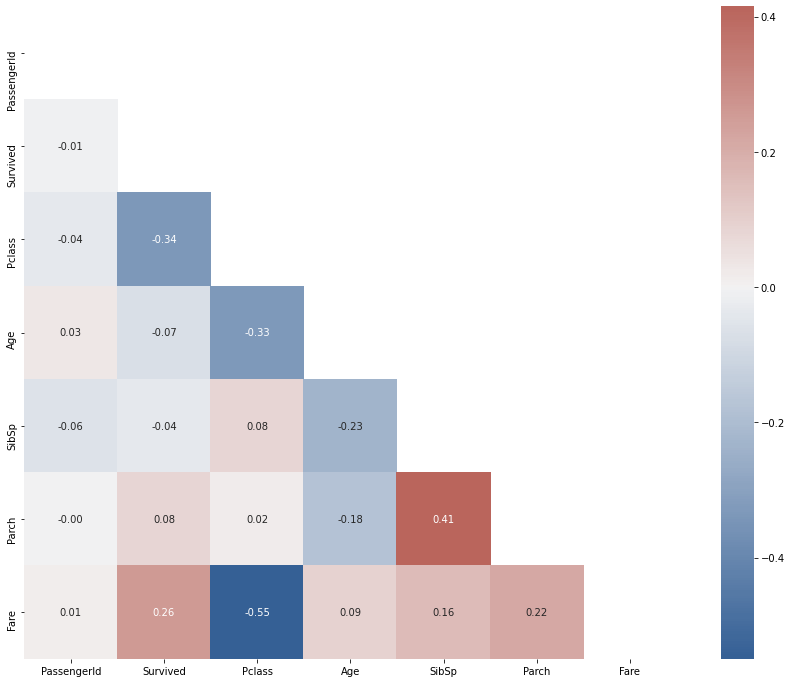

In [38]:
def correlation_matrix(df): 
  """ A function to calculate and plot correlation matrix of a DataFrame. """
   # Create the matrix 
  matrix = train_df.corr() # Create cmap 
  cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
    # Create a mask 
  mask = np.triu(np.ones_like(matrix, dtype=bool)) 
    # Make figsize bigger
  fig, ax = plt.subplots(figsize=(16,12))
      # Plot the matrix
  _ = sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap, ax=ax)

correlation_matrix(train_df)